In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [2]:
# plotting options
plt.rc("figure", dpi=400)                   # High-quality figure ("dots-per-inch")
plt.rc("font", family="sans-serif")         # Crisp axis labels
plt.rc("legend", edgecolor='none')          # No boxes around legends
plt.rcParams['grid.color'] = (0.5, 0.5, 0.5, 0.2)

# colors
charcoal    = [0.1, 0.1, 0.1]
utblue = '#00A9B7'
utorange = '#bf5700'
purple = '#cba6d1'

In [3]:
SUBDIR = "/scratch1/08352/gtpash/hgg/sub-00101"
SUBDIR = "/storage1/transfer/gtp/sub-00101_study"
# RD_EXPS = [ f"rd_freq{ii}" for ii in [1, 7, 14] ]
RDTX_EXPS = [ f"rdtx_freq{ii}" for ii in [1, 7, 14] ]

In [4]:
def compute_stats(df, var:str, lo:float, hi:float):
    # compute mean
    mu = np.mean(df[var])
    print(f"Mean ({var}): {mu}")
    
    std = np.std(df[var])
    print(f"Std. Dev. ({var}): {std}")
    
    qlo = np.quantile(df[var], lo)
    qhi = np.quantile(df[var], hi)
    print(f"Credible Interval ({lo}, {hi}) of ({var}): ({qlo}, {qhi})")
    
    return mu, std, qlo, qhi

## Spectral Decay

In [5]:
# rd_evals = [ np.loadtxt(os.path.join(SUBDIR, f"{exp}_bip", f"{exp}_eigenvalues.txt")) for exp in RD_EXPS ]
rdtx_evals = [ np.loadtxt(os.path.join(SUBDIR, f"{exp}_bip", f"{exp}_eigenvalues.txt")) for exp in RDTX_EXPS ]
exp_names = [ "Imaged Daily", "Imaged Weekly", "Imaged Fortnightly" ]

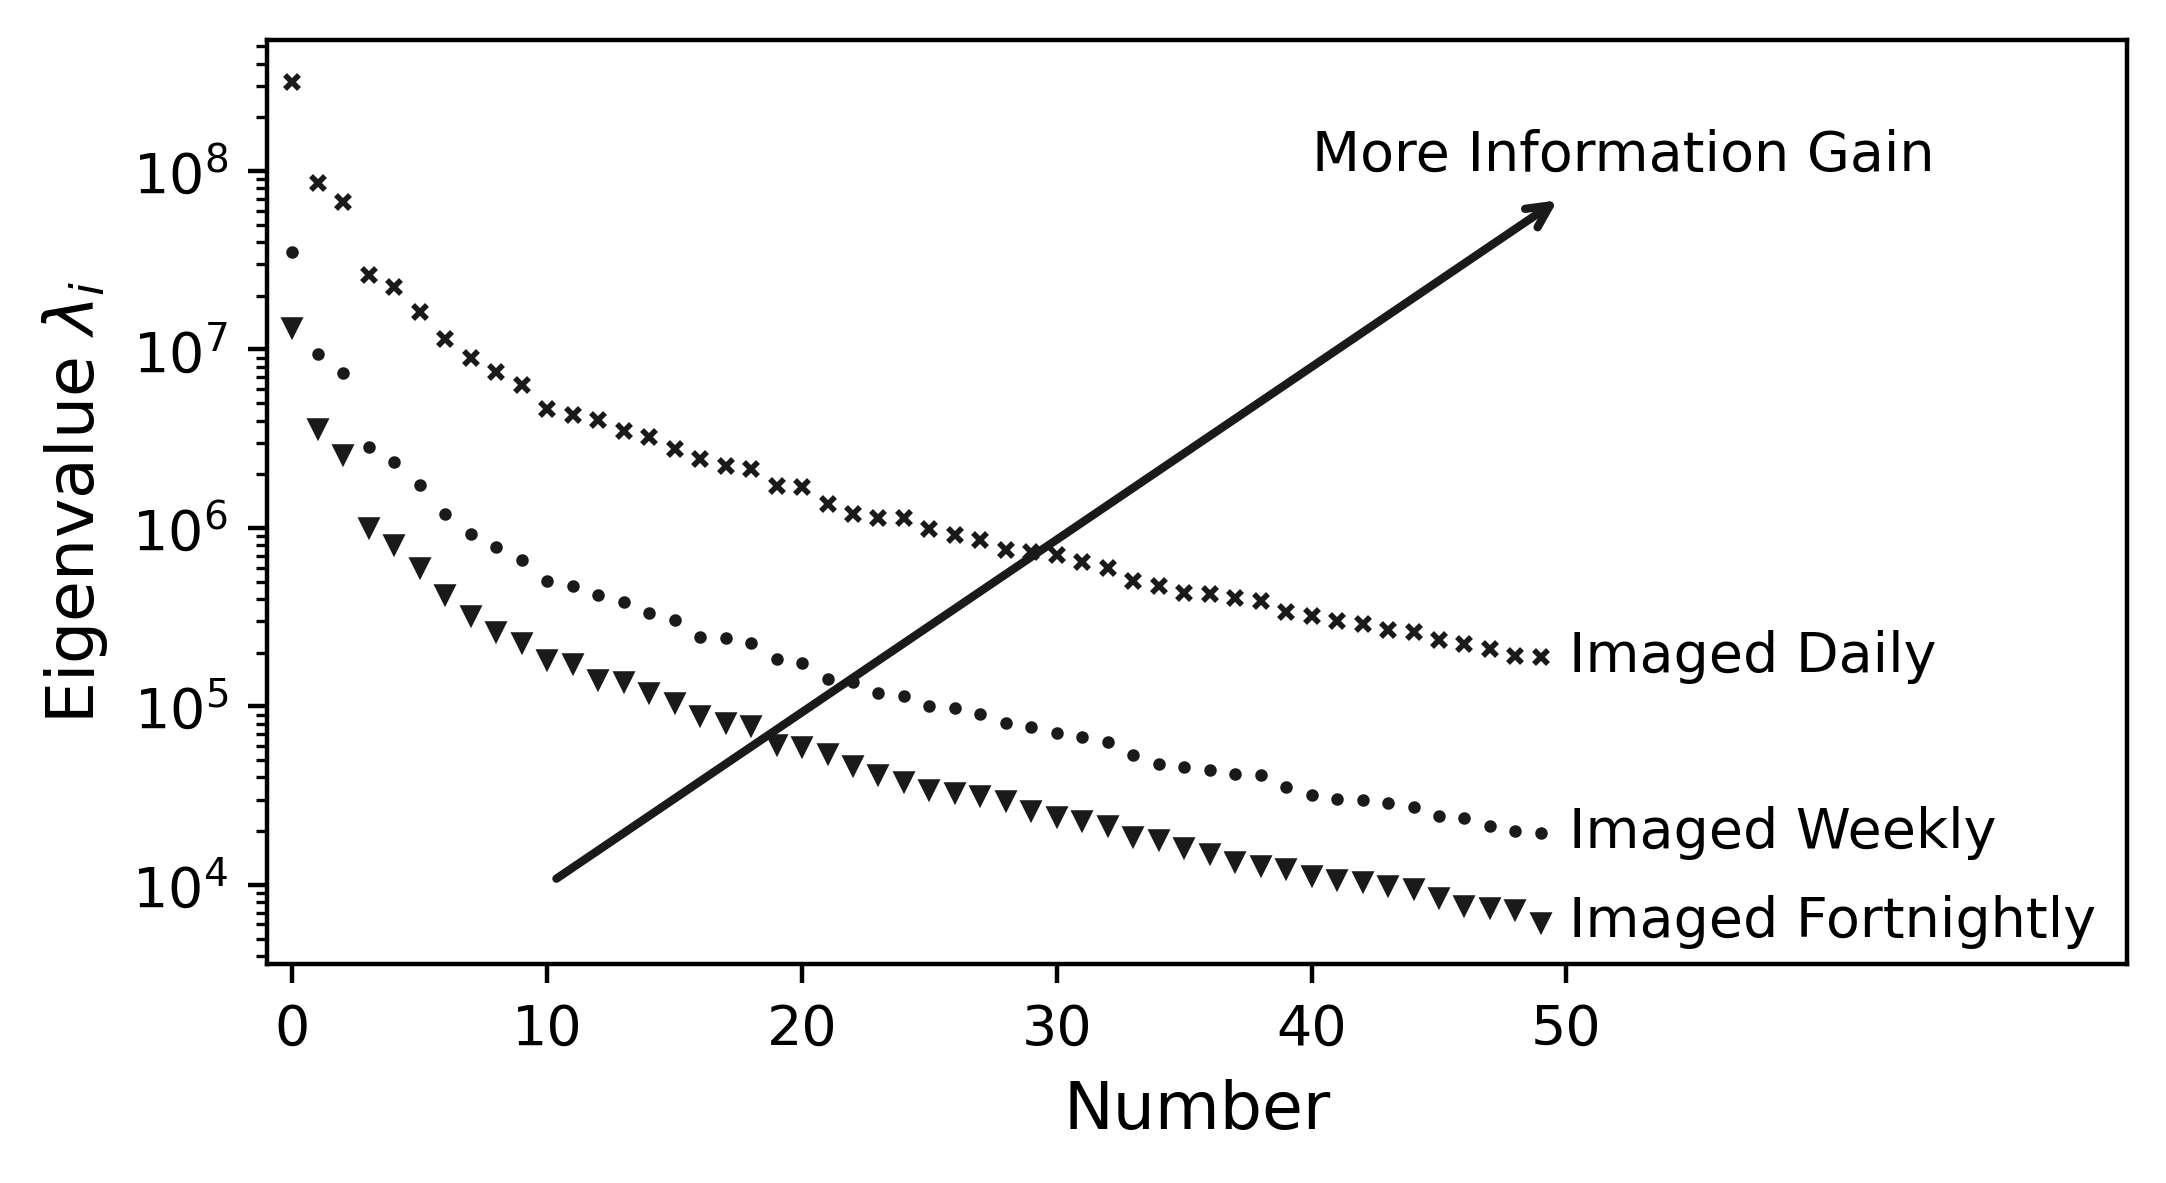

In [6]:
evals = rdtx_evals

fig, ax = plt.subplots(figsize=(6, 3))

numbers = np.arange(len(rdtx_evals[0]))
# lstyles = ["-", "--", "-."]
lstyles = ['x', '.', 'v']

# add eigenvalue data + labels
for idx, vals in enumerate(evals):
    plt.semilogy(numbers, evals[idx], lstyles[idx], color=charcoal, label=exp_names[0], lw=1.5, ms=2.5)
    ax.annotate(xy=(numbers[-1], evals[idx][-1]), xytext=(5,0), textcoords='offset points', text=exp_names[idx], va='center', fontsize=10)

# add arrow describing trend
arrowprop = dict(arrowstyle='<-', color=charcoal, lw=1.5, ls='-')
ax.annotate(text='More Information Gain', xy=(10, 1e4), xytext=(40, 1e8), arrowprops=arrowprop)

# labels, ticks, etc
plt.xlabel('Number', fontsize=12)
plt.ylabel(r'Eigenvalue $\lambda_i$', fontsize=12)
plt.xticks([0, 10, 20, 30, 40, 50])
plt.xlim([-1, 72])
plt.savefig('spectral_decay.pdf', bbox_inches='tight', dpi=300)
plt.show()

## Posterior Predictives

### Dice Coefficient

In [7]:
# rd_post_dice = [ np.load(os.path.join(SUBDIR, f"{exp}_bip", "fwd_prop", "last_to_final_028", f"la_post_dice.npy")) for exp in RD_EXPS ]
# rd_prior_dice = np.load(os.path.join(SUBDIR, f"rd_freq1_bip", "fwd_prop", "last_to_final_028", "prior_dice.npy"))

# long_rdtx_prior_dice = np.load(os.path.join(SUBDIR, f"rdtx_freq1_bip", "fwd_prop", "full", "prior_dice.npy")).squeeze()
# long_rdtx_post_dice = [ np.load(os.path.join(SUBDIR, f"{exp}_bip", "fwd_prop", "full", f"la_post_dice.npy")).squeeze() for exp in RDTX_EXPS ]

In [8]:
# load the data

l2f_rdtx_prior_dice = np.load(os.path.join(SUBDIR, f"rdtx_freq1_bip", "fwd_prop", "last_to_final_028", "prior_dice.npy")).squeeze()
l2f_rdtx_post_dice = [ np.load(os.path.join(SUBDIR, f"{exp}_bip", "fwd_prop", "last_to_final_028", f"la_post_dice.npy")).squeeze() for exp in RDTX_EXPS ]

data_vals = l2f_rdtx_post_dice
data_vals.append(l2f_rdtx_prior_dice)

data_names = ['Daily', 'Weekly', 'Fortnightly', 'Prior']

l2f_dice = pd.DataFrame.from_dict(dict(zip(data_names, data_vals)))

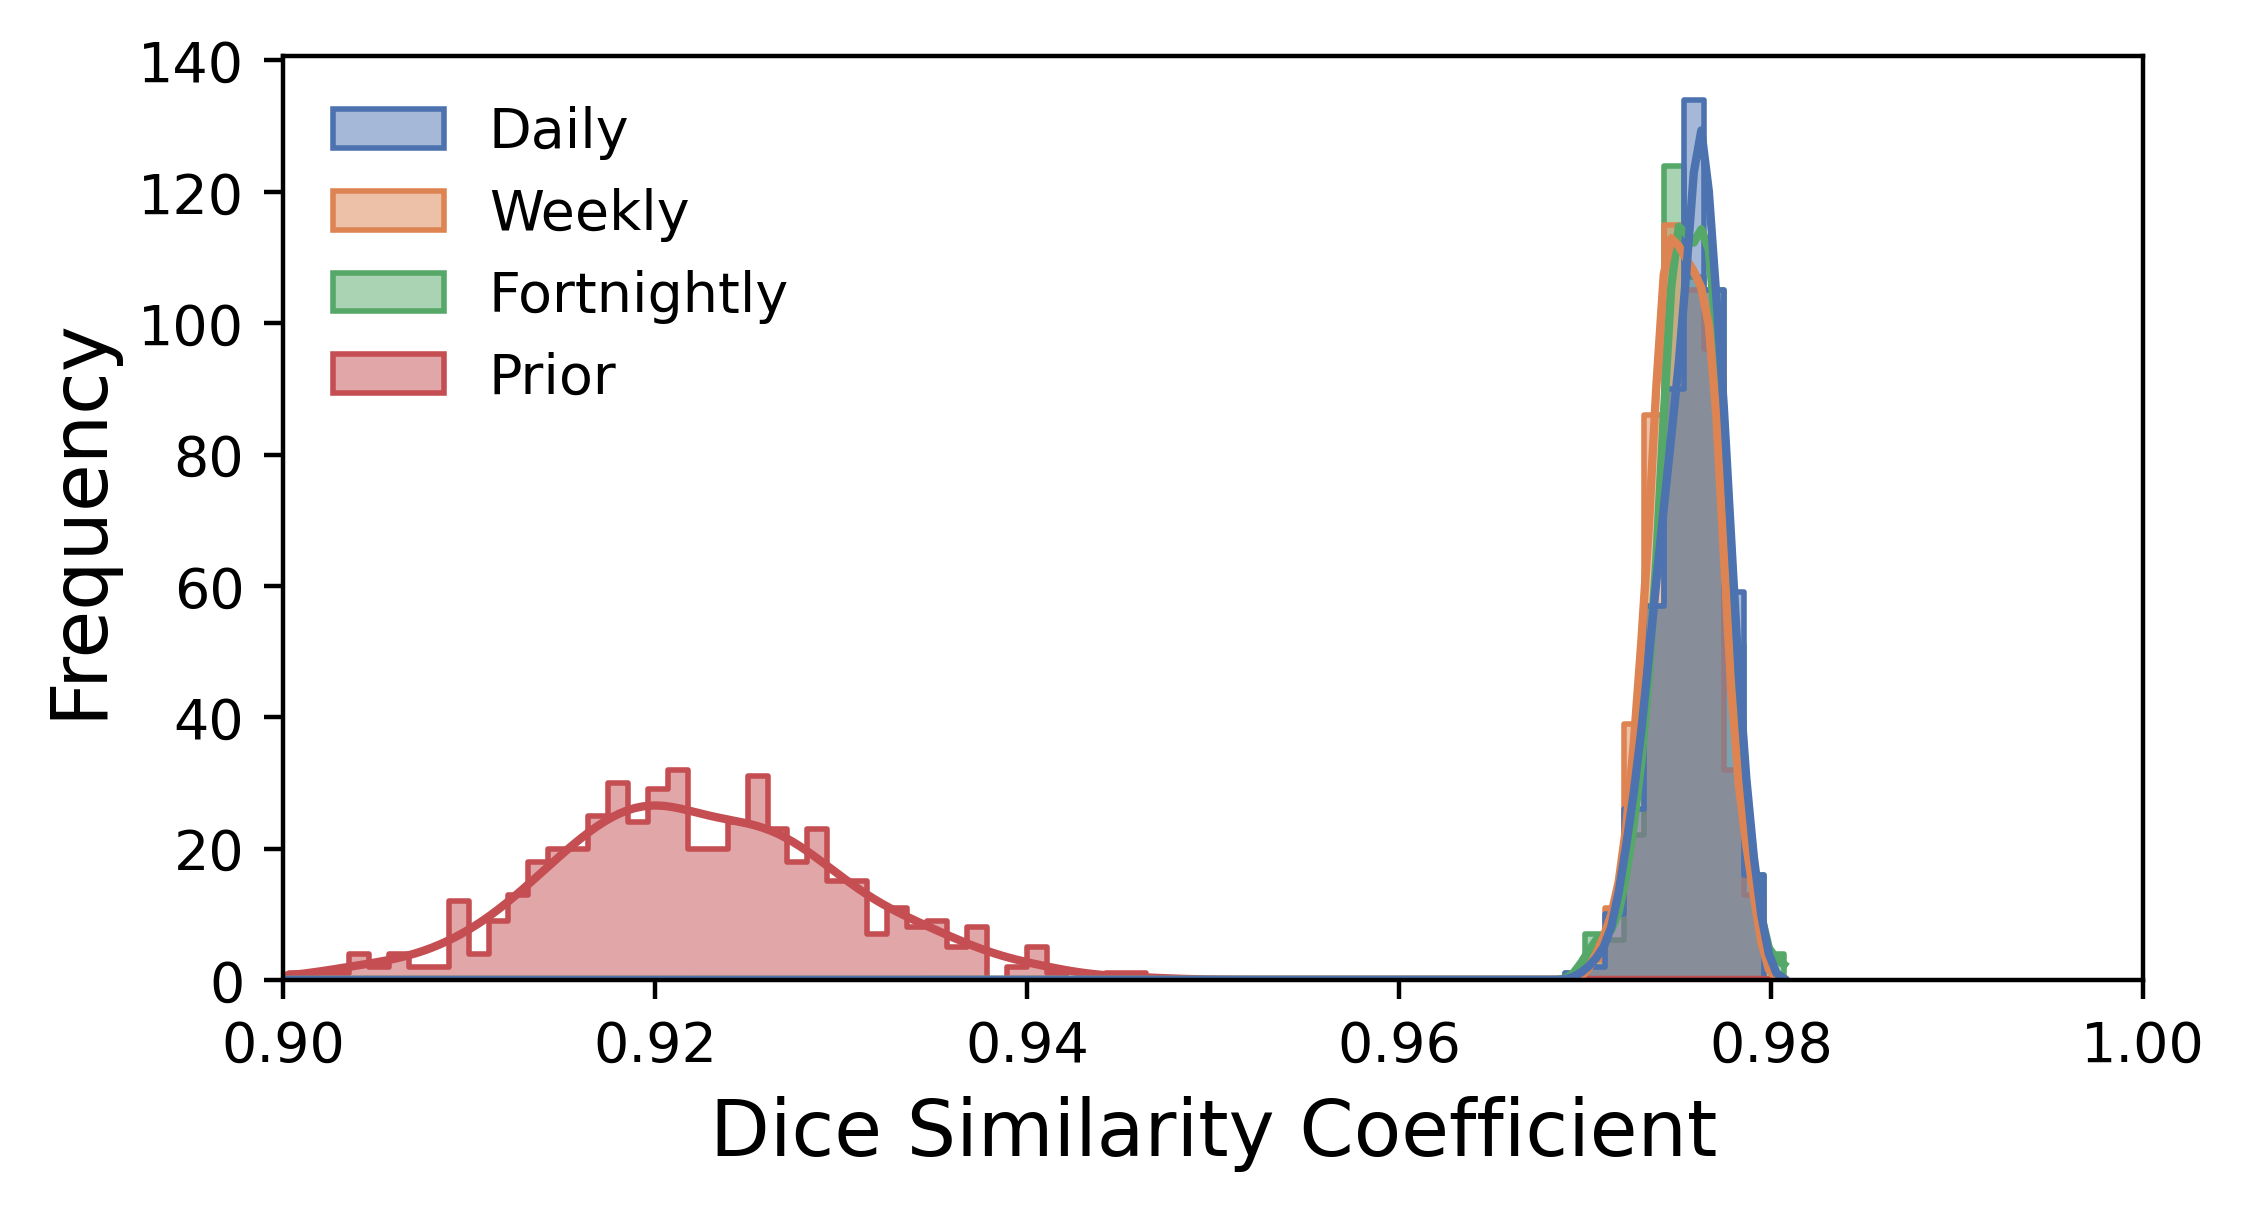

In [9]:
# hexes = [utorange, utblue, "#005F86", "#577565" ]

# "#005F86" bluebonnet
# "#A29B96" nickel

fig, ax = plt.subplots(figsize=(6, 3))

sns.histplot(l2f_dice,
             bins=75, kde=True, legend=True,
            palette="deep", alpha=0.5, element='step'
            )

plt.xlabel('Dice Similarity Coefficient', fontsize=14)
plt.xlim([0.9, 1.0])
plt.ylabel('Frequency', fontsize=14)
plt.savefig('synth_dice.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [10]:
vals = []
lo = 0.05
hi = 0.95
for name in data_names:
    vals.append(compute_stats(l2f_dice, name, lo, hi))

Mean (Daily): 0.975733507857814
Std. Dev. (Daily): 0.001704800627166838
Credible Interval (0.05, 0.95) of (Daily): (0.9726601003567324, 0.9783640500791493)
Mean (Weekly): 0.9753166492667723
Std. Dev. (Weekly): 0.001658154264704811
Credible Interval (0.05, 0.95) of (Weekly): (0.9727455332167839, 0.9779762440288897)
Mean (Fortnightly): 0.9756643099837697
Std. Dev. (Fortnightly): 0.001738727606926731
Credible Interval (0.05, 0.95) of (Fortnightly): (0.9726916724556266, 0.978328355475969)
Mean (Prior): 0.922197119647611
Std. Dev. (Prior): 0.007743426820372416
Credible Interval (0.05, 0.95) of (Prior): (0.909759764117589, 0.934964539337588)


### Concordance Correlation Coefficient

In [11]:
l2f_rdtx_prior_ccc = np.load(os.path.join(SUBDIR, "rdtx_freq1_bip", "fwd_prop", "last_to_final_028", "prior_ccc.npy")).squeeze()
l2f_rdtx_post_ccc = [ np.load(os.path.join(SUBDIR, f"{exp}_bip", "fwd_prop", "last_to_final_028", "la_post_ccc.npy")).squeeze() for exp in RDTX_EXPS ]

data_vals = l2f_rdtx_post_ccc
data_vals.append(l2f_rdtx_prior_ccc)

data_names = ['Daily', 'Weekly', 'Fortnightly', 'Prior']

l2f_ccc_df = pd.DataFrame.from_dict(dict(zip(data_names, data_vals)))

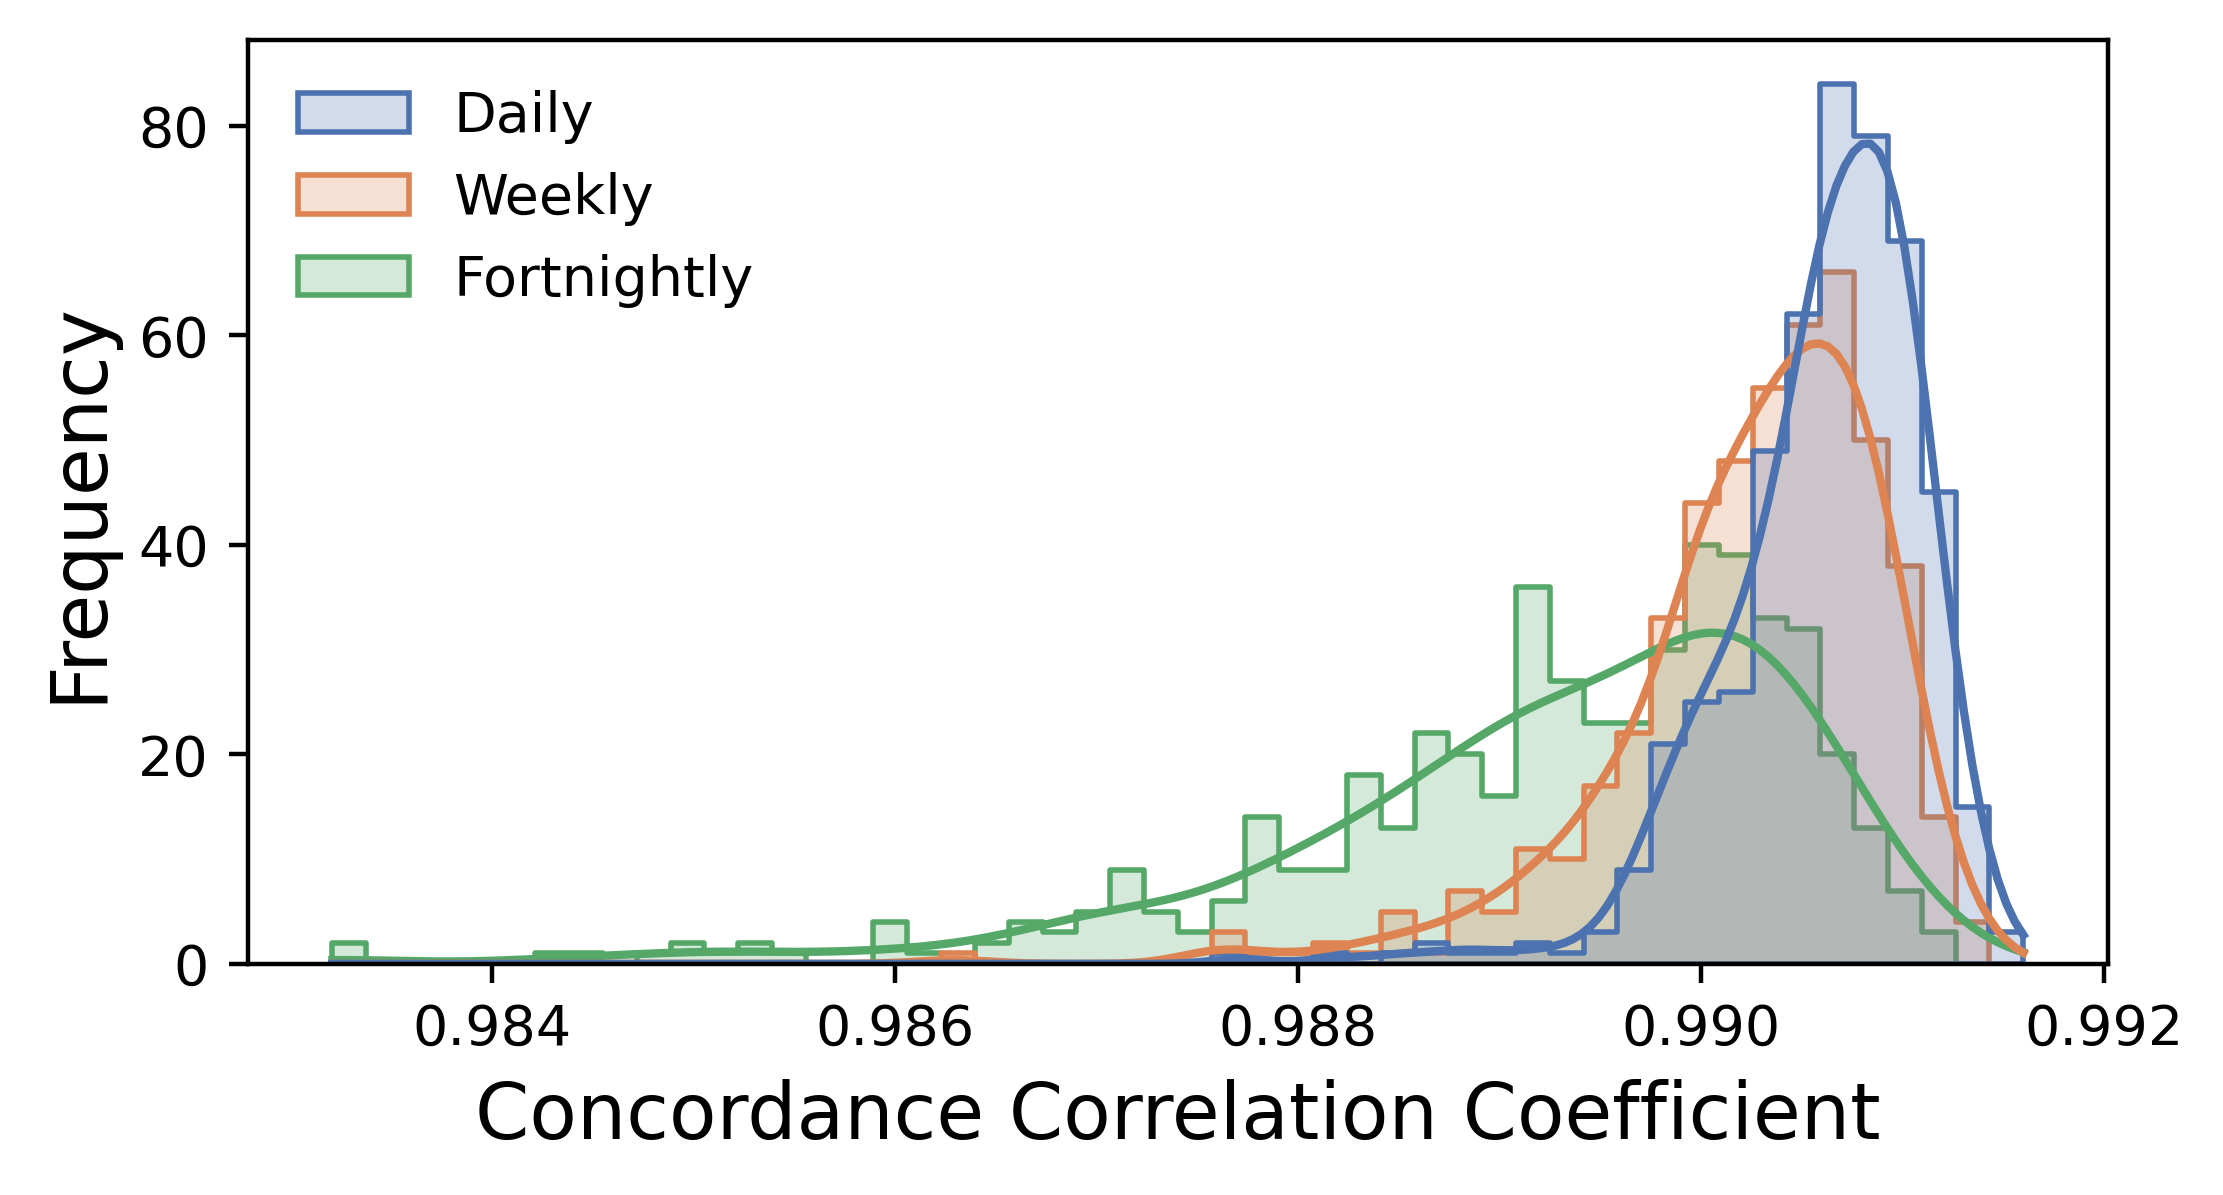

In [12]:
# hexes = [utorange, utblue, "#005F86", "#577565" ]

# "#005F86" bluebonnet
# "#A29B96" nickel

fig, ax = plt.subplots(figsize=(6, 3))

sns.histplot(l2f_ccc_df[data_names[:-1]], 
             bins=50, kde=True, legend=True,
            palette="deep", element='step'
            )

plt.xlabel('Concordance Correlation Coefficient', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.savefig('synth_ccc.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [13]:
vals = []
lo = 0.05
hi = 0.95
for name in data_names:
    vals.append(compute_stats(l2f_ccc_df, name, lo, hi))

Mean (Daily): 0.9906044088874758
Std. Dev. (Daily): 0.0004940664125006902
Credible Interval (0.05, 0.95) of (Daily): (0.9897660925921986, 0.9912181968672392)
Mean (Weekly): 0.9902536792569037
Std. Dev. (Weekly): 0.0006572612719005379
Credible Interval (0.05, 0.95) of (Weekly): (0.9890510254148234, 0.9910409353714785)
Mean (Fortnightly): 0.9892528046234563
Std. Dev. (Fortnightly): 0.0012795984439786484
Credible Interval (0.05, 0.95) of (Fortnightly): (0.98691238729153, 0.9907479746088406)
Mean (Prior): 0.8589270960713793
Std. Dev. (Prior): 0.031225257271464378
Credible Interval (0.05, 0.95) of (Prior): (0.807406891979623, 0.9078868464717503)


In [14]:
print(f'Mann-Whitney U test p-value for Prior v Daily: {stats.mannwhitneyu(l2f_ccc_df['Prior'], l2f_ccc_df['Daily']).pvalue}')
print(f'Mann-Whitney U test p-value for Prior v Weekly: {stats.mannwhitneyu(l2f_ccc_df['Prior'], l2f_ccc_df['Weekly']).pvalue}')
print(f'Mann-Whitney U test p-value for Prior v Fortnightly: {stats.mannwhitneyu(l2f_ccc_df['Prior'], l2f_ccc_df['Fortnightly']).pvalue}')

print(f'Levene test p-value for Prior v Daily: {stats.levene(l2f_ccc_df['Prior'], l2f_ccc_df['Daily'], center='mean').pvalue}')
print(f'Levene test p-value for Prior v Weekly: {stats.levene(l2f_ccc_df['Prior'], l2f_ccc_df['Weekly'], center='mean').pvalue}')
print(f'Levene test p-value for Prior v Fortnightly: {stats.levene(l2f_ccc_df['Prior'], l2f_ccc_df['Fortnightly'], center='mean').pvalue}')

print(f'Mann-Whitney U test p-value for Daily v Weekly: {stats.mannwhitneyu(l2f_ccc_df['Daily'], l2f_ccc_df['Weekly']).pvalue}')
print(f'Mann-Whitney U test p-value for Daily v Weekly: {stats.mannwhitneyu(l2f_ccc_df['Daily'], l2f_ccc_df['Fortnightly']).pvalue}')
print(f'Mann-Whitney U test p-value for Weekly v Fortnightly: {stats.mannwhitneyu(l2f_ccc_df['Weekly'], l2f_ccc_df['Fortnightly']).pvalue}')

print(f'Levene test p-value for Daily v Weekly: {stats.levene(l2f_ccc_df['Daily'], l2f_ccc_df['Weekly'], center='mean').pvalue}')
print(f'Levene test p-value for Daily v Fortnightly: {stats.levene(l2f_ccc_df['Daily'], l2f_ccc_df['Fortnightly'], center='mean').pvalue}')
print(f'Levene test p-value for Weekly v Fortnightly: {stats.levene(l2f_ccc_df['Weekly'], l2f_ccc_df['Fortnightly'], center='mean').pvalue}')

Mann-Whitney U test p-value for Prior v Daily: 5.856242913498941e-165
Mann-Whitney U test p-value for Prior v Weekly: 5.856242913498941e-165
Mann-Whitney U test p-value for Prior v Fortnightly: 5.856242913498941e-165
Levene test p-value for Prior v Daily: 3.4244013830846976e-141
Levene test p-value for Prior v Weekly: 3.6910807806268577e-140
Levene test p-value for Prior v Fortnightly: 4.863309430872486e-136
Mann-Whitney U test p-value for Daily v Weekly: 1.106389137111484e-21
Mann-Whitney U test p-value for Daily v Weekly: 5.451287925435872e-95
Mann-Whitney U test p-value for Weekly v Fortnightly: 6.412252347092457e-50
Levene test p-value for Daily v Weekly: 7.928223319534792e-07
Levene test p-value for Daily v Fortnightly: 5.484251160443162e-46
Levene test p-value for Weekly v Fortnightly: 2.5109160415470897e-28


### Total Tumor Volume

In [15]:
TTV_TRUE = np.load(os.path.join(SUBDIR, "rdtx_freq1_bip", "fwd_prop", "last_to_final_028", "ttv_true.npy")).squeeze()

l2f_rdtx_prior_ttv = np.load(os.path.join(SUBDIR, "rdtx_freq1_bip", "fwd_prop", "last_to_final_028", "prior_ttv.npy")).squeeze()
l2f_rdtx_post_ttv = [ np.load(os.path.join(SUBDIR, f"{exp}_bip", "fwd_prop", "last_to_final_028", "la_post_ttv.npy")).squeeze() for exp in RDTX_EXPS ]

data_vals = l2f_rdtx_post_ttv
data_vals.append(l2f_rdtx_prior_ttv)

data_names = ['Daily', 'Weekly', 'Fortnightly', 'Prior']

l2f_ttv_df = pd.DataFrame.from_dict(dict(zip(data_names, ( data_vals - TTV_TRUE ) / TTV_TRUE )))
l2f_ttv_df['pred'] = 'Last to Final'
l2f_ttv_df['pred'] = l2f_ttv_df['pred'].astype('category')

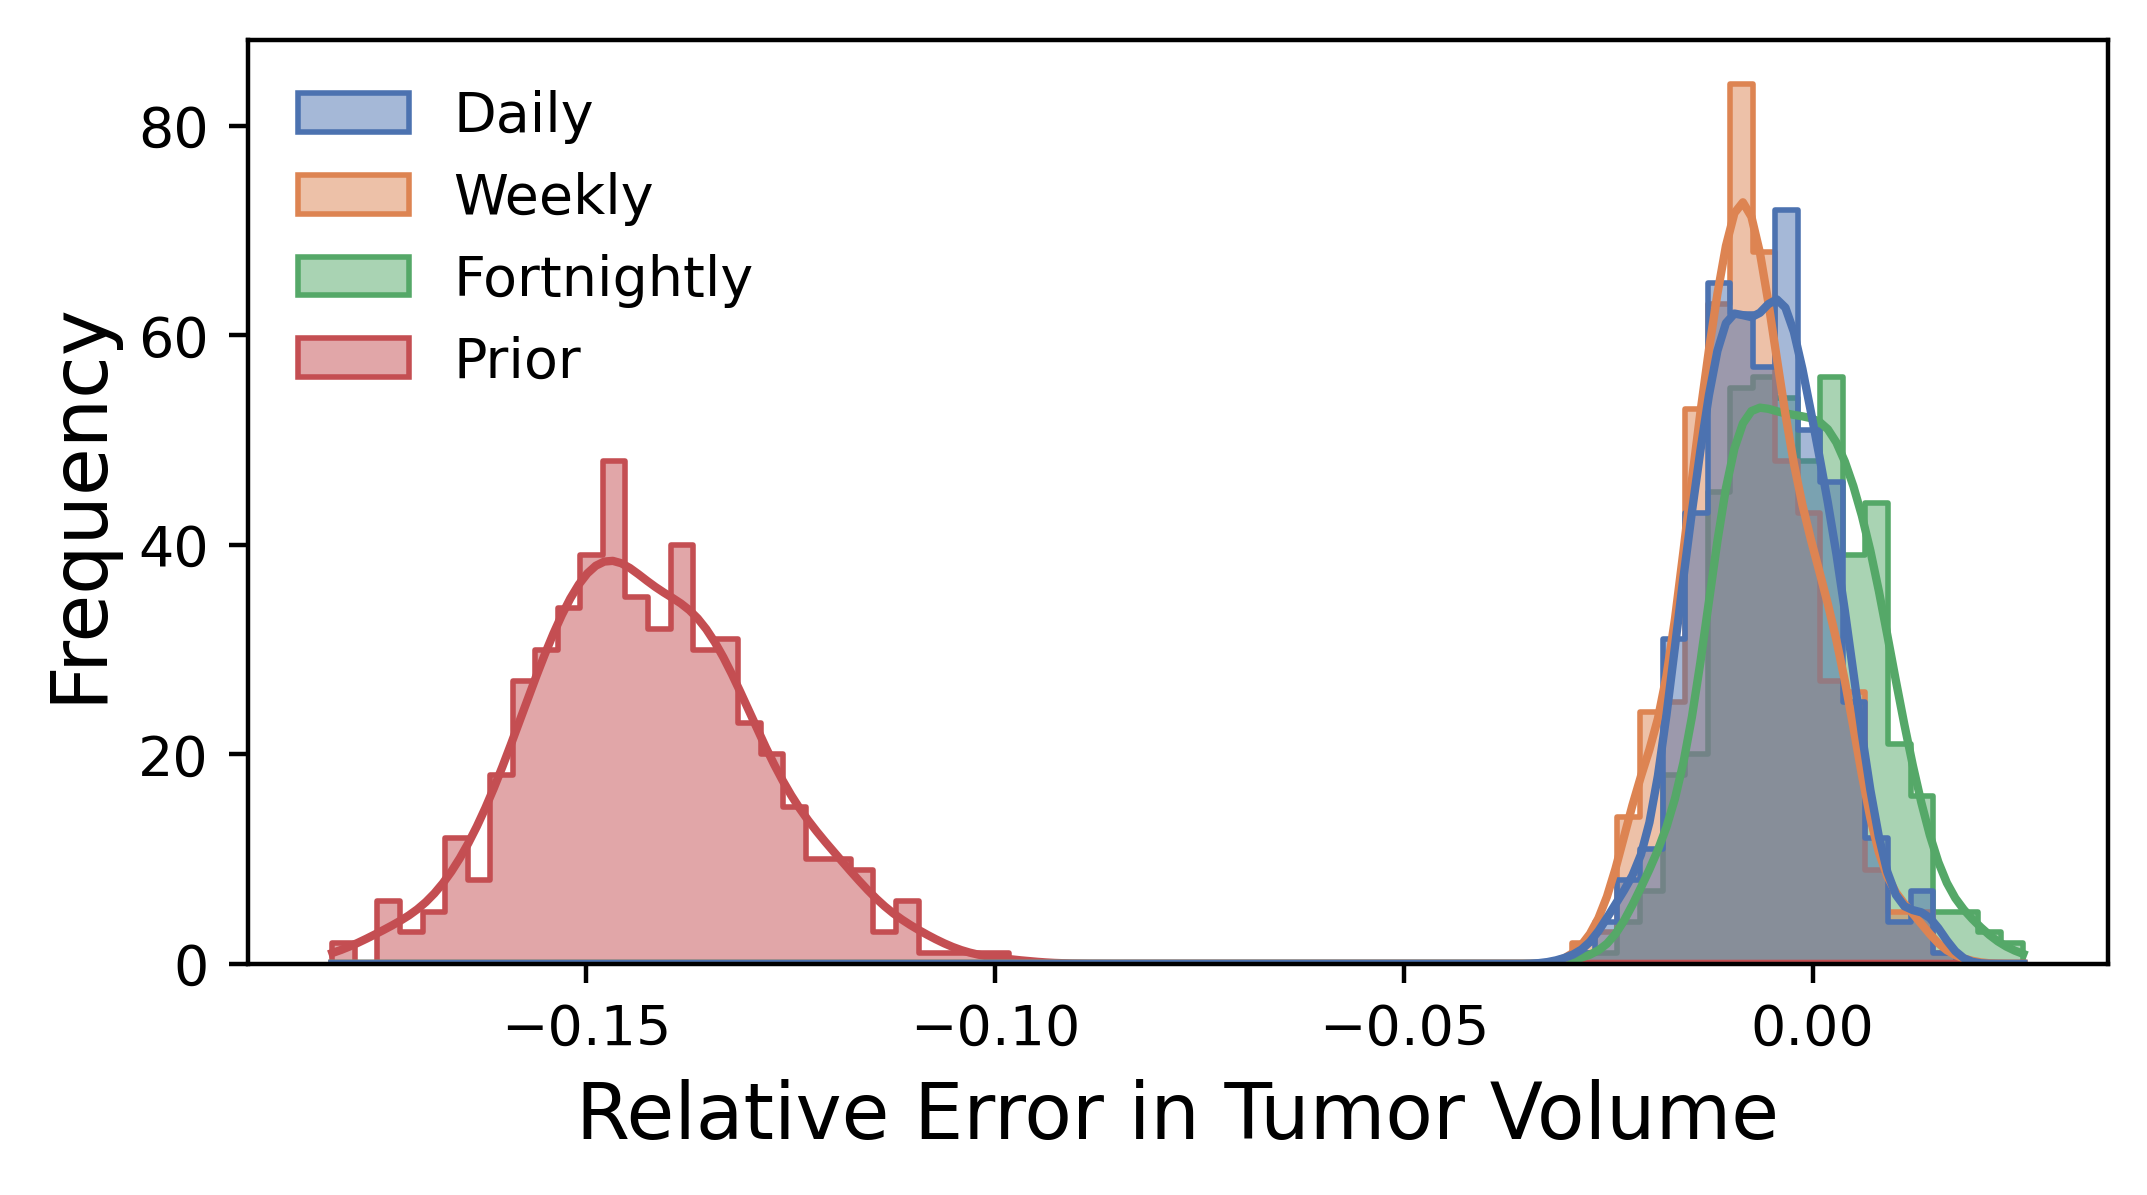

In [16]:
# hexes = [utorange, utblue, "#005F86", "#577565" ]

# "#005F86" bluebonnet
# "#A29B96" nickel

fig, ax = plt.subplots(figsize=(6, 3))

# sns.histplot(i2f_ttv_df[['Laplace Approximation (Daily)', 'Laplace Approximation (Weekly)', 'Laplace Approximation (Fortnightly)']], 
sns.histplot(l2f_ttv_df,
             bins=75, kde=True, legend=True,
            palette="deep", alpha=0.5, element='step'
            )

plt.xlabel('Relative Error in Tumor Volume', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.savefig('synth_rel_ttv.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [17]:
vals = []
lo = 0.05
hi = 0.95
for name in data_names:
    vals.append(compute_stats(l2f_ttv_df, name, lo, hi))

Mean (Daily): -0.006172264069537314
Std. Dev. (Daily): 0.007720757297545944
Credible Interval (0.05, 0.95) of (Daily): (-0.018047340968395456, 0.006149140659706003)
Mean (Weekly): -0.007471553685347672
Std. Dev. (Weekly): 0.007803427543694273
Credible Interval (0.05, 0.95) of (Weekly): (-0.020699959198881866, 0.00556029063244429)
Mean (Fortnightly): -0.001985741345138897
Std. Dev. (Fortnightly): 0.008949771018468885
Credible Interval (0.05, 0.95) of (Fortnightly): (-0.016199810230821544, 0.012430014468907956)
Mean (Prior): -0.1428691296083889
Std. Dev. (Prior): 0.013835345052440752
Credible Interval (0.05, 0.95) of (Prior): (-0.1648690074981906, -0.11898492563098384)


In [18]:
print(f'Mann-Whitney U test p-value for Prior v Daily: {stats.mannwhitneyu(l2f_ttv_df['Prior'], l2f_ttv_df['Daily']).pvalue}')
print(f'Mann-Whitney U test p-value for Prior v Weekly: {stats.mannwhitneyu(l2f_ttv_df['Prior'], l2f_ttv_df['Weekly']).pvalue}')
print(f'Mann-Whitney U test p-value for Prior v Fortnightly: {stats.mannwhitneyu(l2f_ttv_df['Prior'], l2f_ttv_df['Fortnightly']).pvalue}')

print(f'Levene test p-value for Prior v Daily: {stats.levene(l2f_ttv_df['Prior'], l2f_ttv_df['Daily']).pvalue}')
print(f'Levene test p-value for Prior v Weekly: {stats.levene(l2f_ttv_df['Prior'], l2f_ttv_df['Weekly']).pvalue}')
print(f'Levene test p-value for Prior v Fortnightly: {stats.levene(l2f_ttv_df['Prior'], l2f_ttv_df['Fortnightly']).pvalue}')

Mann-Whitney U test p-value for Prior v Daily: 5.856242913498941e-165
Mann-Whitney U test p-value for Prior v Weekly: 5.856242913498941e-165
Mann-Whitney U test p-value for Prior v Fortnightly: 5.856242913498941e-165
Levene test p-value for Prior v Daily: 7.801150776277404e-28
Levene test p-value for Prior v Weekly: 4.549184796233679e-28
Levene test p-value for Prior v Fortnightly: 6.118070593772455e-17


### Example combination of l2f / i2f

In [ ]:
## CCC

### last-to-final

l2f_rdtx_prior_ccc = np.load(os.path.join(SUBDIR, "rdtx_freq1_bip", "fwd_prop", "last_to_final_028", "prior_ccc.npy")).squeeze()
l2f_rdtx_post_ccc = [ np.load(os.path.join(SUBDIR, f"{exp}_bip", "fwd_prop", "last_to_final_028", "la_post_ccc.npy")).squeeze() for exp in RDTX_EXPS ]

data_vals = l2f_rdtx_post_ccc
data_vals.append(l2f_rdtx_prior_ccc)

data_names = ['Daily', 'Weekly', 'Fortnightly', 'Prior']

l2f_ccc_df = pd.DataFrame.from_dict(dict(zip(data_names, data_vals)))

l2f_ccc_df['pred'] = 'Last to Final'
l2f_ccc_df['pred'] = l2f_ccc_df['pred'].astype('category')


### initial-to-final

i2f_rdtx_prior_dice = np.load(os.path.join(SUBDIR, "rdtx_freq1_bip", "fwd_prop", "full", "prior_ccc.npy")).squeeze()
i2f_rdtx_post_dice = [ np.load(os.path.join(SUBDIR, f"{exp}_bip", "fwd_prop", "full", "la_post_ccc.npy")).squeeze() for exp in RDTX_EXPS ]

data_vals = i2f_rdtx_post_dice
data_vals.append(i2f_rdtx_prior_dice)

data_names = ['Laplace Approximation (Daily)', 'Laplace Approximation (Weekly)', 'Laplace Approximation (Fortnightly)', 'Prior']

i2f_ccc_df = pd.DataFrame.from_dict(dict(zip(data_names, data_vals)))
i2f_ccc_df['pred'] = 'Initial to Final'
i2f_ccc_df['pred'] = i2f_ccc_df['pred'].astype('category')

### combined
ccc_df = pd.concat([i2f_ccc_df,l2f_ccc_df])
ccc_df['pred'] = ccc_df['pred'].astype('category')

ccc_df = ccc_df.melt(id_vars=['pred'], value_vars=data_names)

In [ ]:
## Dice

# last to final
l2f_rdtx_prior_dice = np.load(os.path.join(SUBDIR, "rdtx_freq1_bip", "fwd_prop", "last_to_final_028", "prior_voxdice.npy")).squeeze()
l2f_rdtx_post_dice = [ np.load(os.path.join(SUBDIR, f"{exp}_bip", "fwd_prop", "last_to_final_028", "la_post_voxdice.npy")).squeeze() for exp in RDTX_EXPS ]

data_vals = l2f_rdtx_post_dice
data_vals.append(l2f_rdtx_prior_dice)

data_names = ['Laplace Approximation (Daily)', 'Laplace Approximation (Weekly)', 'Laplace Approximation (Fortnightly)', 'Prior']

l2f_dice_df = pd.DataFrame.from_dict(dict(zip(data_names, data_vals)))
l2f_dice_df['pred'] = 'Last to Final'
l2f_dice_df['pred'] = l2f_dice_df['pred'].astype('category')

# initial to final
i2f_rdtx_prior_dice = np.load(os.path.join(SUBDIR, "rdtx_freq1_bip", "fwd_prop", "full", "prior_voxdice.npy")).squeeze()
i2f_rdtx_post_dice = [ np.load(os.path.join(SUBDIR, f"{exp}_bip", "fwd_prop", "full", "la_post_voxdice.npy")).squeeze() for exp in RDTX_EXPS ]

data_vals = i2f_rdtx_post_dice
data_vals.append(i2f_rdtx_prior_dice)

data_names = ['Laplace Approximation (Daily)', 'Laplace Approximation (Weekly)', 'Laplace Approximation (Fortnightly)', 'Prior']

i2f_dice_df = pd.DataFrame.from_dict(dict(zip(data_names, data_vals)))
i2f_dice_df['pred'] = 'Initial to Final'
i2f_dice_df['pred'] = i2f_dice_df['pred'].astype('category')

# concat
dice_df = pd.concat([i2f_dice_df,l2f_dice_df])
dice_df['pred'] = dice_df['pred'].astype('category')

dice_df = dice_df.melt(id_vars=['pred'], value_vars=data_names)


In [ ]:
### TTV

TTV_TRUE = np.load(os.path.join(SUBDIR, "rdtx_freq1_bip", "fwd_prop", "last_to_final_028", "ttv_true.npy")).squeeze()

l2f_rdtx_prior_ttv = np.load(os.path.join(SUBDIR, "rdtx_freq1_bip", "fwd_prop", "last_to_final_028", "prior_ttv.npy")).squeeze()
l2f_rdtx_post_ttv = [ np.load(os.path.join(SUBDIR, f"{exp}_bip", "fwd_prop", "last_to_final_028", "la_post_ttv.npy")).squeeze() for exp in RDTX_EXPS ]

data_vals = l2f_rdtx_post_ttv
data_vals.append(l2f_rdtx_prior_ttv)

data_names = ['Daily', 'Weekly', 'Fortnightly', 'Prior']

l2f_ttv_df = pd.DataFrame.from_dict(dict(zip(data_names, ( data_vals - TTV_TRUE ) / TTV_TRUE )))
l2f_ttv_df['pred'] = 'Last to Final'
l2f_ttv_df['pred'] = l2f_ttv_df['pred'].astype('category')

i2f_rdtx_prior_ttv = np.load(os.path.join(SUBDIR, "rdtx_freq1_bip", "fwd_prop", "full", "prior_ttv.npy")).squeeze()
i2f_rdtx_post_ttv = [ np.load(os.path.join(SUBDIR, f"{exp}_bip", "fwd_prop", "full", "la_post_ttv.npy")).squeeze() for exp in RDTX_EXPS ]

data_vals = i2f_rdtx_post_ttv
data_vals.append(i2f_rdtx_prior_ttv)

data_names = ['Laplace Approximation (Daily)', 'Laplace Approximation (Weekly)', 'Laplace Approximation (Fortnightly)', 'Prior']

i2f_ttv_df = pd.DataFrame.from_dict(dict(zip(data_names, data_vals / TTV_TRUE )))
i2f_ttv_df['pred'] = 'Initial to Final'
i2f_ttv_df['pred'] = i2f_ttv_df['pred'].astype('category')